<a href="https://colab.research.google.com/github/macgyver121/DADS5001/blob/main/week4/Week4_groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
df.head()


,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [3]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,-0.188167,-0.700097
1,bar,one,1.197133,-1.081170
2,foo,two,-0.633552,-0.303235
3,bar,three,0.581640,-0.247436
4,foo,two,-1.246935,-0.120755
5,bar,two,2.279091,0.248591
6,foo,one,-1.977734,1.855270
7,foo,three,-0.693964,-0.986533


In [4]:
grouped = df.groupby("A")

In [5]:
grouped = df.groupby(["A", "B"])

# GroupBy sorting

In [6]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [7]:
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [8]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


Get group

In [9]:
df2.groupby(["X"]).get_group("A")

,X,Y
2,A,3
3,A,4


# **Iterating through groups¶**

In [10]:
grouped = df.groupby('A')
grouped.head()

,A,B,C,D
0,foo,one,-0.188167,-0.700097
1,bar,one,1.197133,-1.081170
2,foo,two,-0.633552,-0.303235
3,bar,three,0.581640,-0.247436
4,foo,two,-1.246935,-0.120755
5,bar,two,2.279091,0.248591
6,foo,one,-1.977734,1.855270
7,foo,three,-0.693964,-0.986533


In [11]:
for name, group in grouped:
    print(name)
    print(group)


bar
     A      B         C         D
1  bar    one  1.197133 -1.081170
3  bar  three  0.581640 -0.247436
5  bar    two  2.279091  0.248591
foo
     A      B         C         D
0  foo    one -0.188167 -0.700097
2  foo    two -0.633552 -0.303235
4  foo    two -1.246935 -0.120755
6  foo    one -1.977734  1.855270
7  foo  three -0.693964 -0.986533


# Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data.

In [ ]:
df

,A,B,C,D
0,foo,one,0.707557,-1.281874
1,bar,one,-1.499860,0.081305
2,foo,two,-1.866754,1.245847
3,bar,three,0.813672,1.325203
4,foo,two,0.100160,-1.332981
5,bar,two,0.573023,1.163003
6,foo,one,-0.293031,0.751799
7,foo,three,-0.345459,-0.081190


In [13]:
grouped = df.groupby("A")
grouped.aggregate(np.sum)

,C,D
A,,
bar,4.057863,-1.080014
foo,-4.740352,-0.255350


In [12]:
grouped = df.groupby("A")
grouped.sum()

,C,D
A,,
bar,4.057863,-1.080014
foo,-4.740352,-0.255350


In [ ]:
grouped = df.groupby(["A", "B"])
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -1.499860  0.081305
    three  0.813672  1.325203
    two    0.573023  1.163003
foo one    0.414526 -0.530076
    three -0.345459 -0.081190
    two   -1.766594 -0.087134

In [ ]:
grouped = df.groupby(["A", "B"], as_index=False)
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-1.499860,0.081305
1,bar,three,0.813672,1.325203
2,bar,two,0.573023,1.163003
3,foo,one,0.414526,-0.530076
4,foo,three,-0.345459,-0.081190
5,foo,two,-1.766594,-0.087134


In [ ]:
df.groupby(["A", "B"]).sum().reset_index()

,A,B,C,D
0,bar,one,-1.499860,0.081305
1,bar,three,0.813672,1.325203
2,bar,two,0.573023,1.163003
3,foo,one,0.414526,-0.530076
4,foo,three,-0.345459,-0.081190
5,foo,two,-1.766594,-0.087134


In [ ]:
grouped.size()

,A,B,size
0,bar,one,1
1,bar,three,1
2,bar,two,1
3,foo,one,2
4,foo,three,1
5,foo,two,2


In [ ]:
grouped.describe()

C                                ...         D                              
  count      mean       std       min  ...       25%       50%       75%       max
0   1.0 -1.499860       NaN -1.499860  ...  0.081305  0.081305  0.081305  0.081305
1   1.0  0.813672       NaN  0.813672  ...  1.325203  1.325203  1.325203  1.325203
2   1.0  0.573023       NaN  0.573023  ...  1.163003  1.163003  1.163003  1.163003
3   2.0  0.207263  0.707523 -0.293031  ... -0.773456 -0.265038  0.243380  0.751799
4   1.0 -0.345459       NaN -0.345459  ... -0.081190 -0.081190 -0.081190 -0.081190
5   2.0 -0.883297  1.390818 -1.866754  ... -0.688274 -0.043567  0.601140  1.245847

[6 rows x 16 columns]

In [14]:
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]
df4 = pd.DataFrame(ll, columns=["A", "B"])
df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [ ]:
df4.value_counts()

A    B
foo  2    2
bar  1    2
foo  1    1
dtype: int64

In [15]:
df4.nunique()

A    2
B    2
dtype: int64

In [ ]:
df4.groupby("A")["B"].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

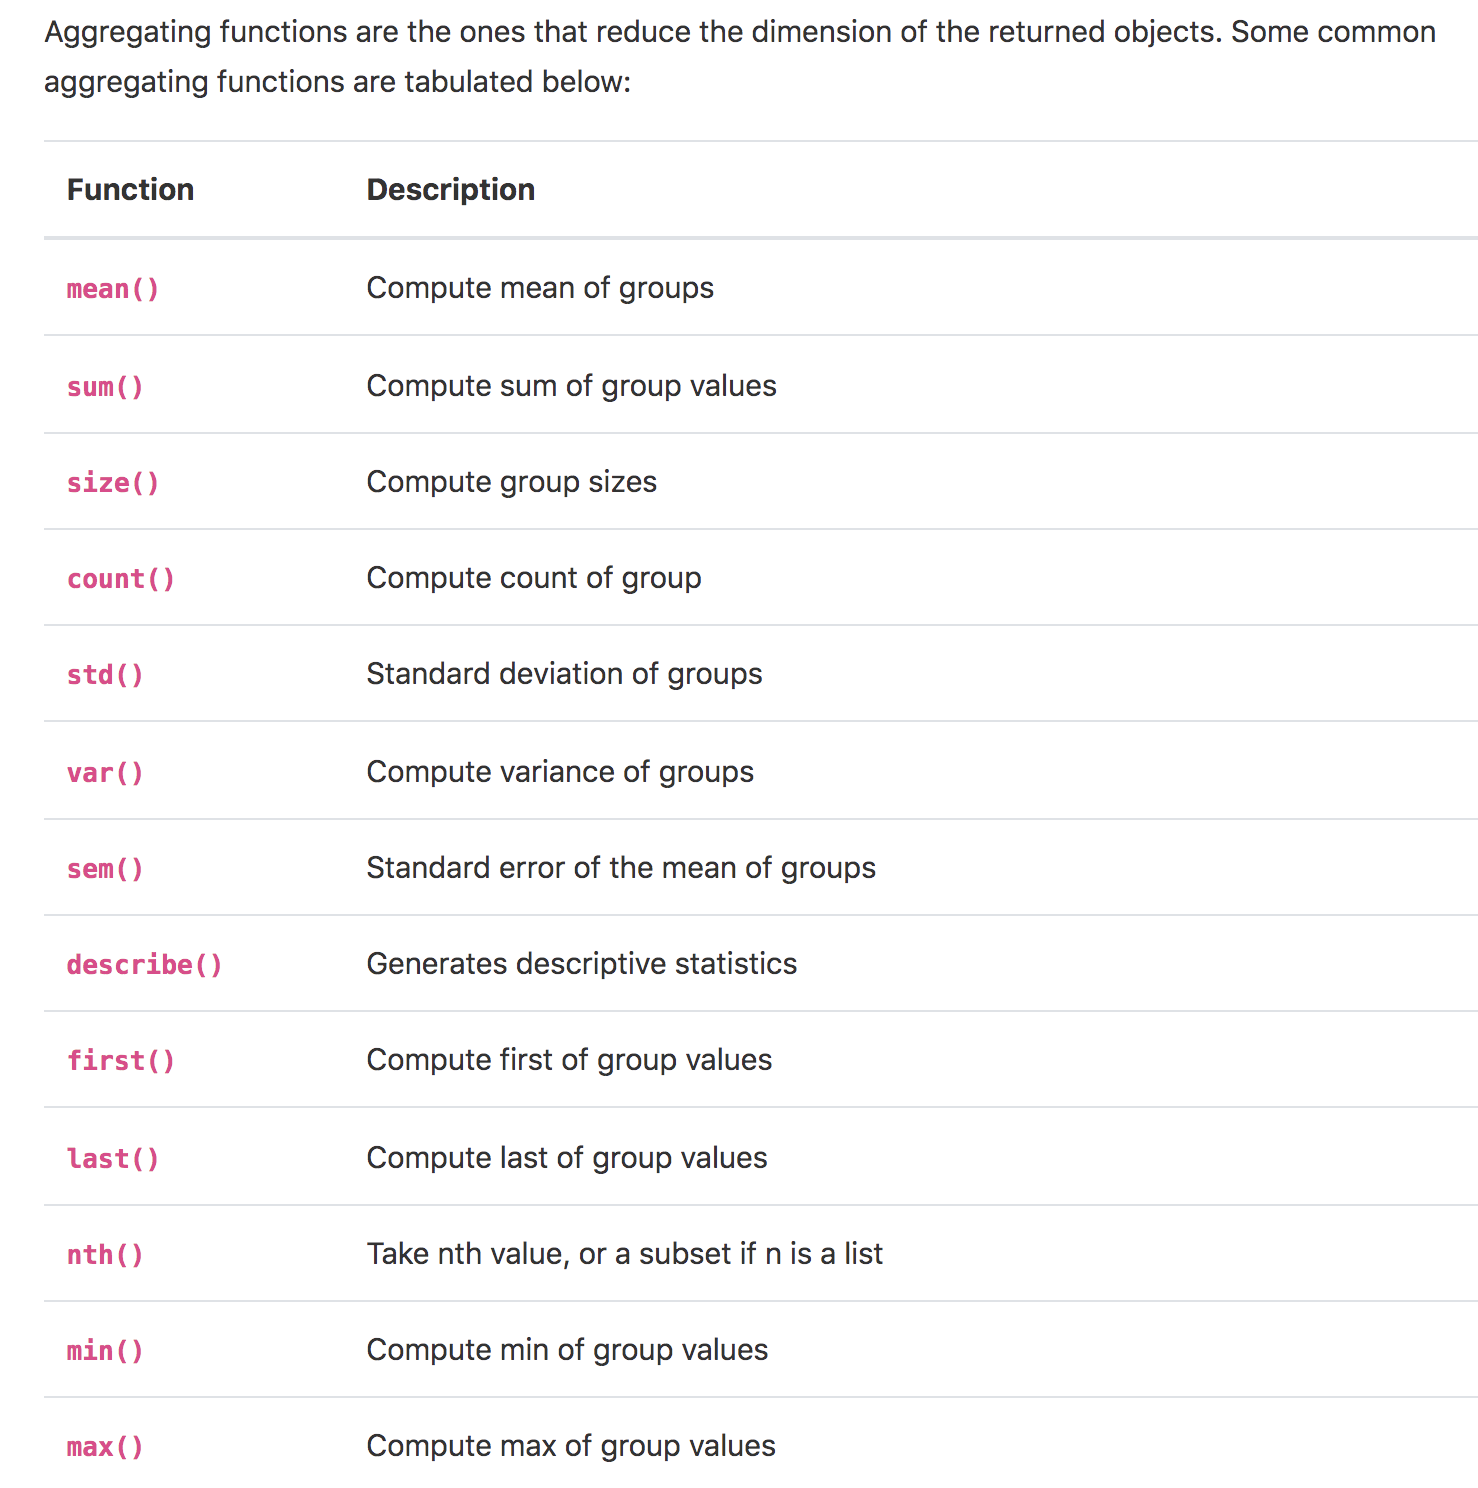

# Named aggregation¶

In [17]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [ ]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="weight", aggfunc=np.mean),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


มันจะสามารถใส่ชื่อหัวตารางเองได้ด้วย

If your desired output column names are not valid Python keywords, construct a dictionary and unpack the keyword arguments

In [ ]:
animals.groupby("kind").agg(
    **{
        "total weight": pd.NamedAgg(column="weight", aggfunc=sum)
    }
)

,total weight
kind,
cat,17.8
dog,205.5


In [ ]:
animals.agg({"height": "mean", "weight": "std"})

height    14.650000
weight    94.789148
dtype: float64

สามารถเขียนแบบนี้ก็ได้

#User-defined functions

In [19]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [21]:
#animals.groupby("kind")[["height"]]

In [25]:
#animals.groupby("kind")[["height"]].agg(lambda x: list(x))

,height
kind,
cat,"[9.1, 9.5]"
dog,"[6.0, 34.0]"


In [ ]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [23]:
animals.groupby("kind")[["height"]].agg(lambda x : len(x) )

,height
kind,
cat,2.0
dog,2.0


In [ ]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18.0
dog,40.0


Filtration

In [ ]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
print(sf)
print("---")
sf.groupby(sf).filter(lambda x: x.sum() > 2) #to take only elements that belong to groups with a group sum greater than 2.

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64
---


3    3
4    3
5    3
dtype: int64

In [ ]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
print(dff)
print("---")
dff.groupby("B").filter(lambda x: len(x) > 2)

   A  B
0  0  a
1  1  a
2  2  b
3  3  b
4  4  b
5  5  b
6  6  c
7  7  c
---


,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [26]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
print(dff)
print("---")
dff.groupby("B").filter(lambda x: len(x) < 4 )

   A  B
0  0  a
1  1  a
2  2  b
3  3  b
4  4  b
5  5  b
6  6  c
7  7  c
---


,A,B
0,0,a
1,1,a
6,6,c
7,7,c


In [32]:
def f(x):
    return pd.Series([x, x ** 2], index=["col", "col^2"])

In [33]:
s = pd.Series(np.random.rand(5))
s

0    0.618075
1    0.075332
2    0.944452
3    0.108181
4    0.282227
dtype: float64

In [34]:
ex3 = s.apply(f)
ex3

,col,col^2
0,0.618075,0.382016
1,0.075332,0.005675
2,0.944452,0.891989
3,0.108181,0.011703
4,0.282227,0.079652


เอา s ไป apply กับ function f ที่เราสร้างขึ้นมา

In [35]:
ex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     5 non-null      float64
 1   col^2   5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes
